### Importing Important Libraries

In [2]:
import math
import sympy  as sp
from sympy.matrices import Matrix
from functools import partial
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from math import pi
import pprint
pp=pprint.PrettyPrinter(indent=5)

##### Declaring Variables


In [3]:
theta_i, alpha_i, d_i, a_i, A_i, a_3, d_1, d_3, d_5, d_7 = sp.symbols('theta_i alpha_i d_i a_i A_i a_3 d_1, d_3, d_5, d_7')
theta_1,theta_2,theta_3,theta_4,theta_5,theta_6,theta_7 = sp.symbols ('theta_1,theta_2, theta_3, theta_4, theta_5, theta_6, theta_7')

##### Rotation and Translation Matrices


In [4]:
Rot_z = sp.Matrix([ [sp.cos(theta_i), -sp.sin(theta_i),0,0], [sp.sin(theta_i),sp.cos(theta_i),0,0], [0,0,1,0], [0,0,0,1] ]);
Rot_x = sp.Matrix([ [1,0,0,0], [0,sp.cos(alpha_i), -sp.sin(alpha_i),0], [0, sp.sin(alpha_i), sp.cos(alpha_i), 0], [0,0,0,1] ]); 
Tran_z = sp.Matrix([[1,0,0,0], [0,1,0,0], [0,0,1,d_i], [0,0,0,1]]);
Tran_x = sp.Matrix([[1,0,0,a_i], [0,1,0,0], [0,0,1,0], [0,0,0,1]]);
print("\nRotation Matrix for rotation about Z")
pp.pprint(Rot_z)
print("\nRotation Matrix for rotation about X")
pp.pprint(Rot_x)
print("\nTranslation Matrix for translation about Z")
pp.pprint(Tran_z)
print("\nTranslation Matrix for translation about X")
pp.pprint(Tran_x)


Rotation Matrix for rotation about Z
Matrix([
[cos(theta_i), -sin(theta_i), 0, 0],
[sin(theta_i),  cos(theta_i), 0, 0],
[           0,             0, 1, 0],
[           0,             0, 0, 1]])

Rotation Matrix for rotation about X
Matrix([
[1,            0,             0, 0],
[0, cos(alpha_i), -sin(alpha_i), 0],
[0, sin(alpha_i),  cos(alpha_i), 0],
[0,            0,             0, 1]])

Translation Matrix for translation about Z
Matrix([
[1, 0, 0,   0],
[0, 1, 0,   0],
[0, 0, 1, d_i],
[0, 0, 0,   1]])

Translation Matrix for translation about X
Matrix([
[1, 0, 0, a_i],
[0, 1, 0,   0],
[0, 0, 1,   0],
[0, 0, 0,   1]])


##### General Homogeneous Matrix

In [5]:
A_i=Rot_z*Tran_z*Tran_x*Rot_x;
pp.pprint(A_i)

Matrix([
[cos(theta_i), -sin(theta_i)*cos(alpha_i),  sin(alpha_i)*sin(theta_i), a_i*cos(theta_i)],
[sin(theta_i),  cos(alpha_i)*cos(theta_i), -sin(alpha_i)*cos(theta_i), a_i*sin(theta_i)],
[           0,               sin(alpha_i),               cos(alpha_i),              d_i],
[           0,                          0,                          0,                1]])


### DH Parameter Table for Fixed $\theta_3$

| Link | $a_i$ | $\theta_i$ | $\alpha_i$ | $d_i$ |
| --- | --- | --- | --- | --- |
| 1 | 0 | $\theta_1^*$ | 90 | $d_1$ |
| 2 | 0 | $\theta_2^*$ | -90 | 0 |
| 3 | $a_3$ | 0 | -90 | $d_3$ |
| 4 | $-a_3$ | $\theta_4^*$ | 90 | 0 |
| 5 | 0 | $\theta_5^*$ | 90 | $d_5$ |
| 6 | $a_3$ | $\theta_6^*$ | -90 | 0 |
| 7 | 0 | $\theta_7^*$ | 0 | $-d_7$ |

##### Homogenous Matrix Ad0

In [6]:
Ad0=A_i.subs([(theta_i,math.radians(-90)),(alpha_i,math.radians(90)),(a_i,0),(d_i,0)])
Ad0

Matrix([
[6.12323399573677e-17, 6.12323399573677e-17,                  -1.0, 0],
[                -1.0, 3.74939945665464e-33, -6.12323399573677e-17, 0],
[                   0,                  1.0,  6.12323399573677e-17, 0],
[                   0,                    0,                     0, 1]])

##### Homogenous Matrix A1

In [7]:
A1=A_i.subs([(theta_i,theta_1),(alpha_i,math.radians(0)),(a_i,0),(d_i,0)])
A1

Matrix([
[cos(theta_1), -sin(theta_1), 0, 0],
[sin(theta_1),  cos(theta_1), 0, 0],
[           0,             0, 1, 0],
[           0,             0, 0, 1]])

##### Homogenous Matrix Ad1

In [8]:
Ad1=A_i.subs([(theta_i,math.radians(-90)),(alpha_i,math.radians(-90)),(a_i,0),(d_i,-64.85)])
Ad1

Matrix([
[6.12323399573677e-17, 6.12323399573677e-17,                  1.0,      0],
[                -1.0, 3.74939945665464e-33, 6.12323399573677e-17,      0],
[                   0,                 -1.0, 6.12323399573677e-17, -64.85],
[                   0,                    0,                    0,      1]])

##### Homogenous Matrix A2

In [9]:
A2=A_i.subs([(theta_i,theta_2),(alpha_i,math.radians(0)),(a_i,0),(d_i,140)])
A2

Matrix([
[cos(theta_2), -sin(theta_2), 0,   0],
[sin(theta_2),  cos(theta_2), 0,   0],
[           0,             0, 1, 140],
[           0,             0, 0,   1]])

##### Homogenous Matrix Ad2

In [10]:
Ad2=A_i.subs([(theta_i,math.radians(0)),(alpha_i,math.radians(0)),(a_i,500),(d_i,0)])
Ad2

Matrix([
[1, 0, 0, 500],
[0, 1, 0,   0],
[0, 0, 1,   0],
[0, 0, 0,   1]])

##### Homogenous Matrix A3

In [11]:
A3=A_i.subs([(theta_i,theta_3),(alpha_i,math.radians(0)),(a_i,0),(d_i,0)])
A3

Matrix([
[cos(theta_3), -sin(theta_3), 0, 0],
[sin(theta_3),  cos(theta_3), 0, 0],
[           0,             0, 1, 0],
[           0,             0, 0, 1]])

##### Homogenous Matrix A4

In [12]:
A4=A_i.subs([(theta_i,0),(alpha_i,math.radians(0)),(a_i,450),(d_i,0)])
A4

Matrix([
[1, 0, 0, 450],
[0, 1, 0,   0],
[0, 0, 1,   0],
[0, 0, 0,   1]])

### Steps to Get the Jacobian Matrix usinh Method 2

##### Transformation Matrix  $T_e^0$ from $O_0$ to $O_e$

In [13]:
T1=Ad0*A1
T2=Ad0*A1*Ad1*A2
T3=Ad0*A1*Ad1*A2*Ad2*A3
T4=Ad0*A1*Ad1*A2*Ad2*A3*A4
T = T4.subs([(theta_1,math.radians(0)),(theta_2,math.radians(-45)),(theta_3,math.radians(45))])
print("Transformation Matrix with joint angle set to required position")
T


Transformation Matrix with joint angle set to required position


Matrix([
[                    0, 1.0,                    0, -288.703390593274],
[-6.12323399573677e-17,   0,                 -1.0,            -140.0],
[                 -1.0,   0, 6.12323399573677e-17, -803.553390593274],
[                    0,   0,                    0,                 1]])

#### Calculating the Z vector for all links

In [14]:
print ("The Z0 matrix is given:")
Z0 = T1[:3,2]
pp.pprint(Z0)

The Z0 matrix is given:
Matrix([
[                 -1.0],
[-6.12323399573677e-17],
[ 6.12323399573677e-17]])


In [15]:
print ("The Z1 matrix is given:")
Z1 = T2[:3,2]
pp.pprint(Z1)

The Z1 matrix is given:
Matrix([
[6.12323399573677e-17*sin(theta_1) + 6.12323399573677e-17*cos(theta_1) - 6.12323399573677e-17],
[                 6.12323399573677e-17*sin(theta_1) - 1.0*cos(theta_1) - 3.74939945665464e-33],
[                 1.0*sin(theta_1) + 6.12323399573677e-17*cos(theta_1) + 3.74939945665464e-33]])


In [16]:
print ("The Z2 matrix is given:")
Z2 = T3[:3,2]
pp.pprint(Z2)

The Z2 matrix is given:
Matrix([
[6.12323399573677e-17*sin(theta_1) + 6.12323399573677e-17*cos(theta_1) - 6.12323399573677e-17],
[                 6.12323399573677e-17*sin(theta_1) - 1.0*cos(theta_1) - 3.74939945665464e-33],
[                 1.0*sin(theta_1) + 6.12323399573677e-17*cos(theta_1) + 3.74939945665464e-33]])


In [17]:
print ("The Z4 matrix is given:")
Z3 = T4[:3,2]
pp.pprint(Z3)

The Z4 matrix is given:
Matrix([
[6.12323399573677e-17*sin(theta_1) + 6.12323399573677e-17*cos(theta_1) - 6.12323399573677e-17],
[                 6.12323399573677e-17*sin(theta_1) - 1.0*cos(theta_1) - 3.74939945665464e-33],
[                 1.0*sin(theta_1) + 6.12323399573677e-17*cos(theta_1) + 3.74939945665464e-33]])


#### Forming the columns $J_1$ to $J_6$ of the Jacobian Matrix

In [18]:
Xp=T4[:3,3]
diff_thet_1 = Xp.diff(theta_1) #Partially differentiating Xp wrt θ1

diff_thet_2 = Xp.diff(theta_2) #Partially differentiating Xp wrt θ2

diff_thet_3 = Xp.diff(theta_3) #Partially differentiating Xp wrt θ4


print("The initial jacobian matrix for home position is given by:")
J = Matrix([[diff_thet_1[0],diff_thet_2[0],diff_thet_3[0]],
          [diff_thet_1[1],diff_thet_2[1],diff_thet_3[1]],
          [diff_thet_1[2],diff_thet_2[2],diff_thet_3[2]],
          [Z0[0],Z1[0],Z2[0]],[Z0[1],Z1[1],Z2[1]],[Z0[2],Z1[2],Z2[2]]])

J1=J.subs([(theta_1,0),(theta_2,0),(theta_3,0)])
J1

The initial jacobian matrix for home position is given by:


Matrix([
[ 6.67432505535308e-14,                 950.0,                 450.0],
[               -950.0,                     0,                     0],
[                140.0, -5.81707229594993e-14, -2.75545529808154e-14],
[                 -1.0,                     0,                     0],
[-6.12323399573677e-17,                  -1.0,                  -1.0],
[ 6.12323399573677e-17,  6.12323399573677e-17,  6.12323399573677e-17]])

### Circle equations

#### The equation of ciecle is given by
$y^2+(z-72.5)^2=100$  
Using the polar form  
$y=r\cos(\theta),z=r\sin(\theta)$  
Therefore,  
$\dot{y}=r\cos(\theta)\dot{\theta}$  
$\dot{z}=r\sin(\theta)\dot{\theta}$

Also, $\dot{\theta}=\frac{2\pi}{5}$

In [19]:
T=T4
T_eval=T.subs([(theta_1,0),(theta_2,-0.7),(theta_3,1.5)])
# T_eval.simplify()
T_eval

Matrix([
[    0.717356090899523,    0.696706709347165,                    0,  65.5513972859398],
[-4.26609820773246e-17, 4.39253920284479e-17,                 -1.0,            -140.0],
[   -0.696706709347165,    0.717356090899523, 6.12323399573677e-17, -695.939112848469],
[                    0,                    0,                    0,                 1]])

#### Using the above equations and the Jacobian matrix we compute the tool positions over a time period using Numerical Integration

In [20]:
import numpy as np
import sympy as sp
x,y,z,r,o=sp.symbols("x y z r theta")
dt=0.05  #Time difference
t_1=[math.radians(0)]  #Theta 1
t_2=[-0.7]  #Theta 2
t_3=[1.5]  #Theta 4
front_right_joint=[]
T=T4
x_tool=[]
y_tool=[]
z_tool=[]
#Tool Velocity Matrix
X=sp.Matrix([[100*sp.sin((2*np.pi*o)/200)*(2*np.pi)/10],[0],[100*sp.cos((2*np.pi*o)/200)*(2*np.pi)/10],[0],[0],[0]])
X1=sp.Matrix([[-40],[0],[0],[0],[0],[0]])
file_name='trot_front_right.npy'
i=0
j=0
print("Computing Trajectory")
while i<=200:
    if i<100:
        X_eval=X.subs(o,i)
    if i>100:
        X_eval=X1.subs(o,j)
        j+=1
    front_right_joint.append([t_1[i],t_2[i],t_3[i]])
    T_eval=T.subs([(theta_1,t_1[i]),(theta_2,t_2[i]),(theta_3,t_3[i])])
    x_tool.append(T_eval[3])
    y_tool.append(T_eval[7])
    z_tool.append(T_eval[11])
    J_eval=J.subs([(theta_1,t_1[i]),(theta_2,t_2[i]),(theta_3,t_3[i])])
    q=J_eval.pinv()*X_eval
    q=q*dt
#     print(q)
    t_1.append(q[0]+t_1[i])
    t_2.append(q[1]+t_2[i])
    t_3.append(q[2]+t_3[i])
    
    print(".",end="")
    i=i+1

array = np.array(front_right_joint)
np.save(file_name, array)

Computing Trajectory
.........................................................................................................................................................................................................

### Plotting trajectory in 2D Space

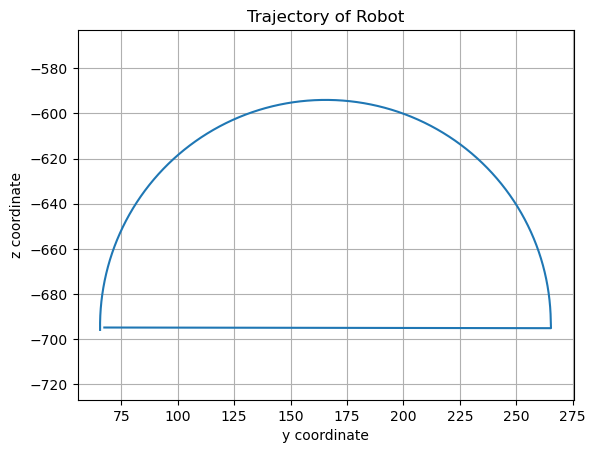

In [21]:
import matplotlib.pyplot as plt
plt.plot(x_tool,z_tool)
# plt.scatter(0,0.725)
plt.xlabel("y coordinate")
plt.ylabel("z coordinate")
plt.axis("equal")
plt.title("Trajectory of Robot")
plt.grid(True)
plt.show()

### Plotting Trajectory in 3D Space

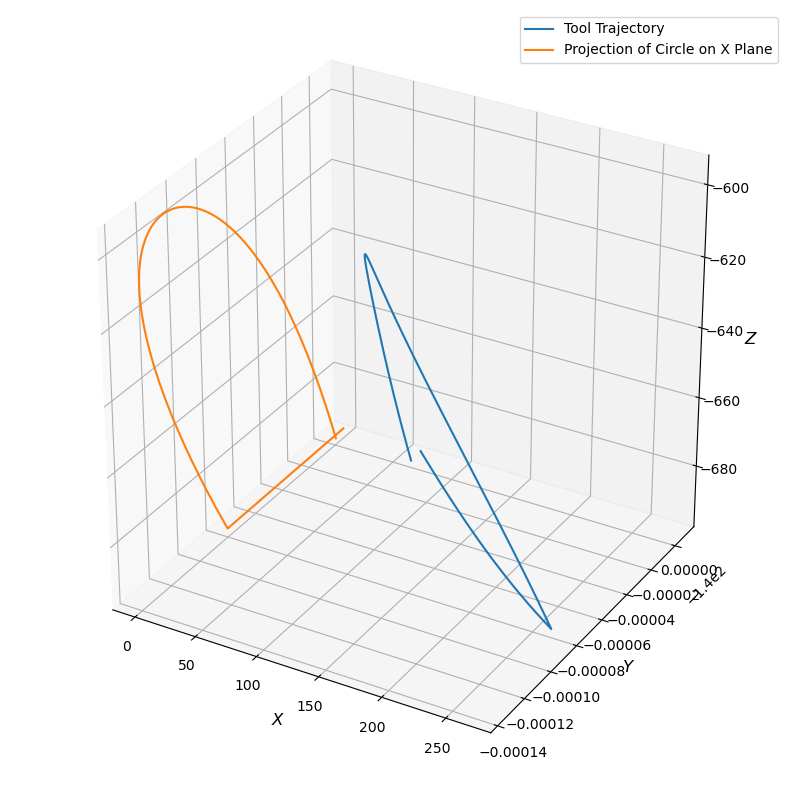

In [22]:
ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')
# ax.axes.set_xlim3d(left=0.65, right=0.7) 
# ax.axes.set_ylim3d(bottom=-0.15, top=0.15) 
# ax.axes.set_zlim3d(bottom=0.625, top=0.825) 
ax.set_xlabel('$X$', fontsize=12)
ax.set_ylabel('$Y$', fontsize=12)
ax.set_zlabel('$Z$', fontsize=12)
# ax.set_zticks(np.linspace(0.625,0.825,5).round(3))
# ax.set_xticks(np.linspace(0.65,0.7,20).round(2))
# ax.set_yticks(np.linspace(-0.15,0.15,5).round(2))
ax.plot(x_tool, y_tool, z_tool, label='Tool Trajectory')
ax.plot(np.full(len(y_tool),0.65), y_tool, z_tool, label='Projection of Circle on X Plane')
ax.legend()

plt.show()


In [23]:
front_right_joint

[[0.0, -0.7, 1.5],
 [2.63651055151647e-9, -0.704388528480752, 1.50974151642953],
 [5.35502224274068e-9, -0.708605271463034, 1.51942761882744],
 [8.15584629095369e-9, -0.712644586503961, 1.52904979081417],
 [1.10392387003570e-8, -0.716500983081226, 1.53859955836437],
 [1.40053886194929e-8, -0.720169132885286, 1.54806849135848],
 [1.70544060608232e-8, -0.723643880511664, 1.55744820542409],
 [2.01863089944900e-8, -0.726920254539753, 1.56673036410332],
 [2.34010098154557e-8, -0.729993478978365, 1.57590668138079],
 [2.66983012086349e-8, -0.732858985051743, 1.58496892460392],
 [3.00778414259415e-8, -0.735512423292964, 1.59390891782525],
 [3.35391390173786e-8, -0.737949675904533, 1.60271854559365],
 [3.70815370531595e-8, -0.740166869338657, 1.61138975721819],
 [4.07041968934821e-8, -0.742160387042182, 1.61991457152574],
 [4.44060815755597e-8, -0.743926882303588, 1.62828508212954],
 [4.81859388974953e-8, -0.745463291131795, 1.63649346322250],
 [5.20422843003810e-8, -0.746766845089030, 1.644531